In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Đọc data 

In [3]:
df3=pd.read_csv('/content/data3.csv')
df4=pd.read_csv('/content/data4.csv')
df2=pd.read_csv('/content/data2.csv')

In [4]:
def convert(df2):
  X2=df2.iloc[:,:-1]
  X2=np.array(X2)
  X2=X2.reshape(len(X2),1)
  y2=df2.iloc[:,-1]
  y2=np.array(y2)
  return X2,y2

In [5]:
X2,y2=convert(df2)
X3,y3=convert(df3)
X4,y4=convert(df4)

Train model linear Regression với data2

In [ ]:
from sklearn.linear_model import LinearRegression
Rg= LinearRegression()
Rg.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plot fit line 


In [14]:
def plot_data(X,y,Rg):
  plt.subplots(figsize=(10,10))
  plt.scatter(X, y)
  y_pred=np.array(Rg.predict(X))
  plt.scatter(X, y_pred)
  plt.show()

data2

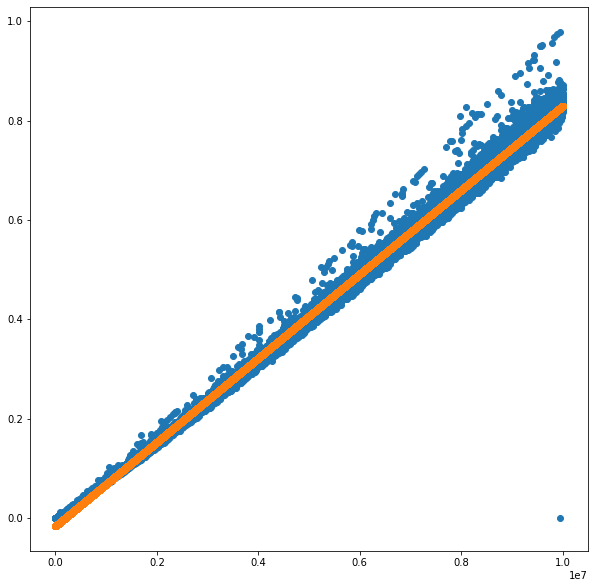

In [15]:
plot_data(X2,y2,Rg)

data3

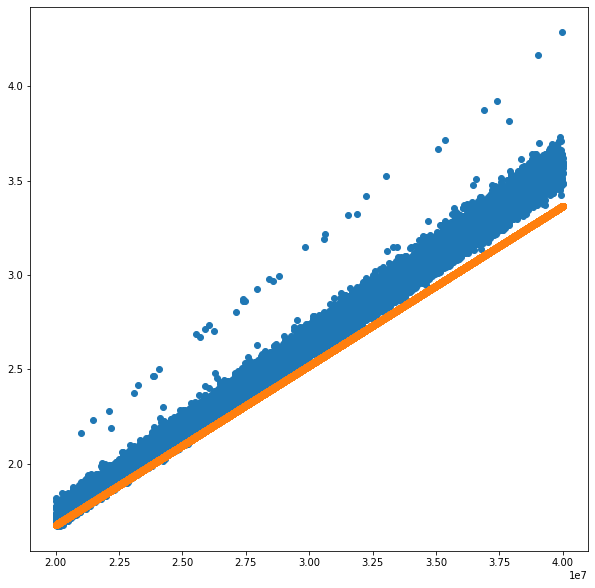

In [16]:
plot_data(X3,y3,Rg)

data4
  

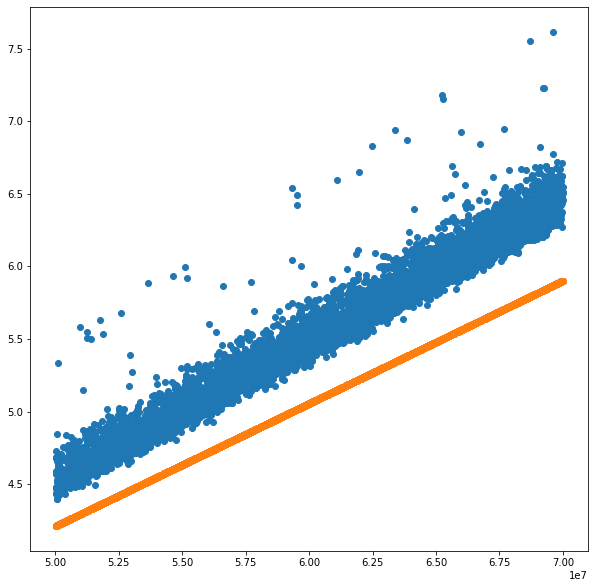

In [17]:
plot_data(X4,y4,Rg)

Đánh giá model

In [18]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2


In [19]:
def evaluate_MSE(X,y,Rg):
  y_pred=Rg.predict(X)
  return mse(y,y_pred)

In [20]:
print('Mean Square Error data2: ',evaluate_MSE(X2,y2,Rg))
print('Mean Square Error data3: ',evaluate_MSE(X3,y3,Rg))
print('Mean Square Error data4: ',evaluate_MSE(X4,y4,Rg))

Mean Square Error data2:  0.00013540921072488003
Mean Square Error data3:  0.020727488065206322
Mean Square Error data4:  0.2242520032088473


- Có thể thấy rằng từ hình plot đường thẳng từ model Linear Regression ta thấy có kết quả ý nghĩa trên bộ data2 và data3. Trong khi đó ở bộ data4 đã có tình trạng overfitting và kết quả lệch khá cao.
- Việc đánh giá bằng độ đo MSE có vẻ chưa cho ta thấy rõ được model chúng ta có tốt hay không và tốt như thế nào, bởi vì chúng ta chỉ biết nó càng nhỏ thì càng tốt. Vì vậy nhóm em đã tìm hiểu và đưa ra độ đo mới có ý nghĩa hơn, đó là độ đo R-Square(R2).


- **R-bình phương (R2) là một thước đo thống kê đại diện cho tỷ lệ phương sai của một biến phụ thuộc được giải thích bởi một biến hay nhiều biến độc lập trong mô hình hồi quy.**
- **Bởi vì giá trị R2 được cố định trong khoảng từ 0 - 1, vì vậy khi R2 dần tiến về 1 thì  có thể kết luận mối liên hệ giữa biến phụ thuộc và biến độc lập càng chặt chẽ.**
- **Lưu ý: Đối với các model Non-linear phức tạp không phải cứ R2 cao là model luôn tốt, vì vậy lời khuyên đưa ra là chúng ta nên plot đường fit lines trước khi tiến hành tính R2.**

In [21]:
def evaluate_R2(X,y,Rg):
  y_pred=Rg.predict(X)
  return r2(y,y_pred)

In [69]:
print('R2 data2: ',evaluate_R2(X2,y2,Rg))
print('R2 data3: ',evaluate_R2(X3,y3,Rg))
print('R2 data4: ',evaluate_R2(X4,y4,Rg))

R2 data2:  0.9977265766697754
R2 data3:  0.9281519518941507
R2 data4:  0.31344865295547053


Model biểu diễn trên data2, data3 tốt với R2 > 90%
Model bị overfitting và cho kết quả tệ trên data4  với R2 < 50%

Ngoài độ đo R2, ta có thể sử dụng Cross- Validation để đánh giá model. Cross-Validation là việc phân nhóm một mẫu dữ liệu thành các mẫu con để cho việc phân tích ban đầu chỉ thực hiện trên một mẫu con đơn, còn các mẫu con còn lại được giữ "kín" để dùng cho việc xác nhận và kiểm chứng lại lần phân tích đầu tiên đó.

In [33]:
from sklearn.model_selection import cross_val_score
Rg1=LinearRegression()
cv=5 # ta chia tập thành 5 mẫu
scores = cross_val_score(Rg1, X2, y2, cv=5)
print(scores) # Kết quả ứng với từng mẫu

[0.99755402 0.99795079 0.99788421 0.99797161 0.99719601]


Solution:
  - Train lại model sử dụng Regulation Function như : Rigde Regression, Lasso Regresion,...
  - Thêm dữ liệu

- **Sử dụng Ridge Regression** : là một loại hồi quy tuyến tính thường xuyên phổ biến bao gồm Hàm phạt L2. Điều này có tác dụng thu hẹp các hệ số cho những biến đầu vào không đóng góp nhiều cho việc dự đoán.
-  **ridge_loss = loss + (lambda * l2_penalty)** 


In [64]:
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import RepeatedKFold


In [90]:
model = Ridge(alpha=10)
# define grid
# perform the search
model.fit(X3, y3)
model.score(X3,y3)
# summarize

0.9883586899162626

In [80]:
y2.shape

(58494,)

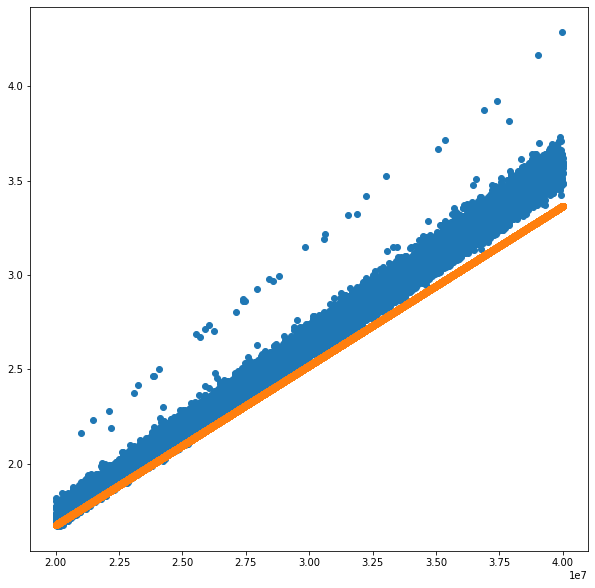

In [68]:
plot_data(X3,y3,results)

In [101]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import sklearn
from sklearn.pipeline import Pipeline

In [155]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1000000)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X2, y2)

print('Training Score: {}'.format(ridge_pipe.score(X2, y2)))
print('Test Score: {}'.format(ridge_pipe.score(X4, y4)))

KeyboardInterrupt: ignored

**Thêm dữ liệu**


In [156]:
X=np.concatenate((X2,X3))
y=np.concatenate((y2,y3))

In [158]:
from sklearn.linear_model import LinearRegression
Rg_X23= LinearRegression()
Rg_X23.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

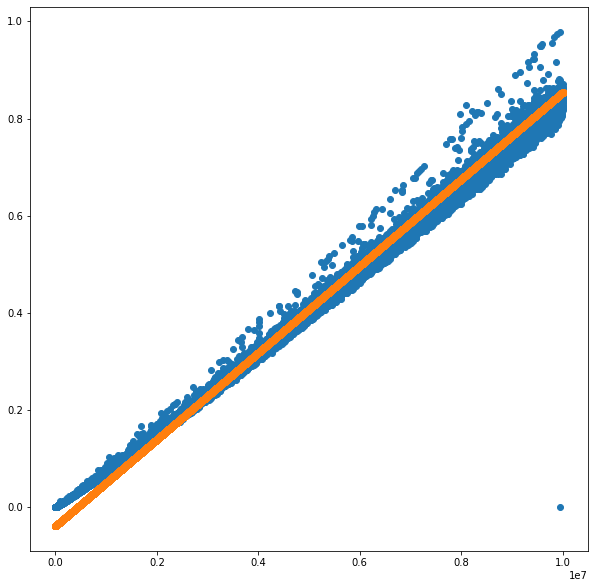

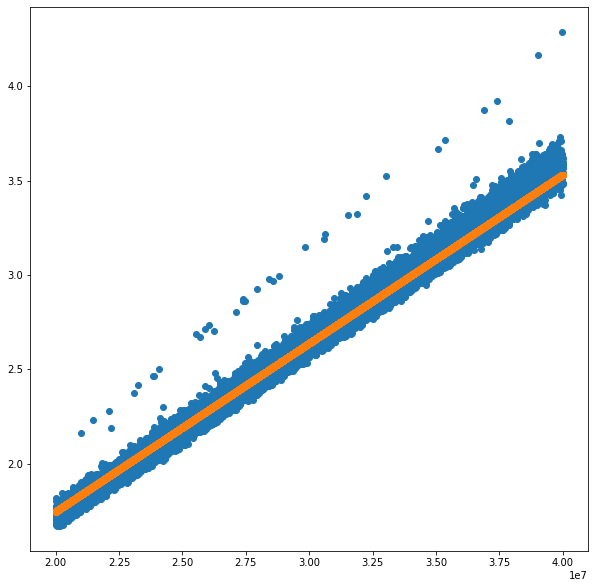

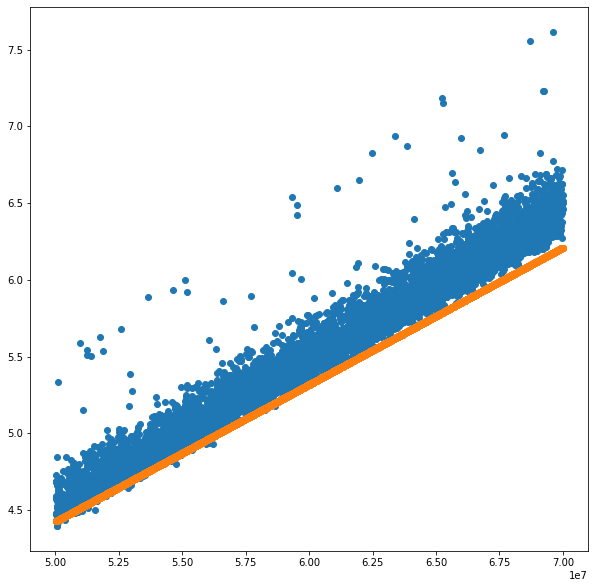

In [159]:
plot_data(X2,y2,Rg_X23)
plot_data(X3,y3,Rg_X23)
plot_data(X4,y4,Rg_X23)

In [160]:
print('Mean Square Error data2: ',evaluate_MSE(X2,y2,Rg_X23))
print('Mean Square Error data3: ',evaluate_MSE(X3,y3,Rg_X23))
print('Mean Square Error data4: ',evaluate_MSE(X4,y4,Rg_X23))
print('R2 data2: ',evaluate_R2(X2,y2,Rg_X23))
print('R2 data3: ',evaluate_R2(X3,y3,Rg_X23))
print('R2 data4: ',evaluate_R2(X4,y4,Rg_X23))

Mean Square Error data2:  0.00032197788880685416
Mean Square Error data3:  0.0037710036254774686
Mean Square Error data4:  0.052869277143015314
R2 data2:  0.9945942226506496
R2 data3:  0.9869285053240271
R2 data4:  0.838139802898422
